<a href="https://colab.research.google.com/github/Marco-Pedicillo/Fondamenti-di-IA/blob/main/Copia_di_Homework_Fondamenti_di_IA_AA_2023_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [155]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [156]:
dataset = dataset.sample(frac=1)
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training_print = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_ohe = pd.get_dummies(dataset) #Dataset One Hot Encoding
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]
dataset_training_ohe = dataset_ohe[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)] #Dataset Training One Hot Encoding
dataset_test_ohe = dataset_ohe[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):] #Dataset Test One Hot Encoding

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

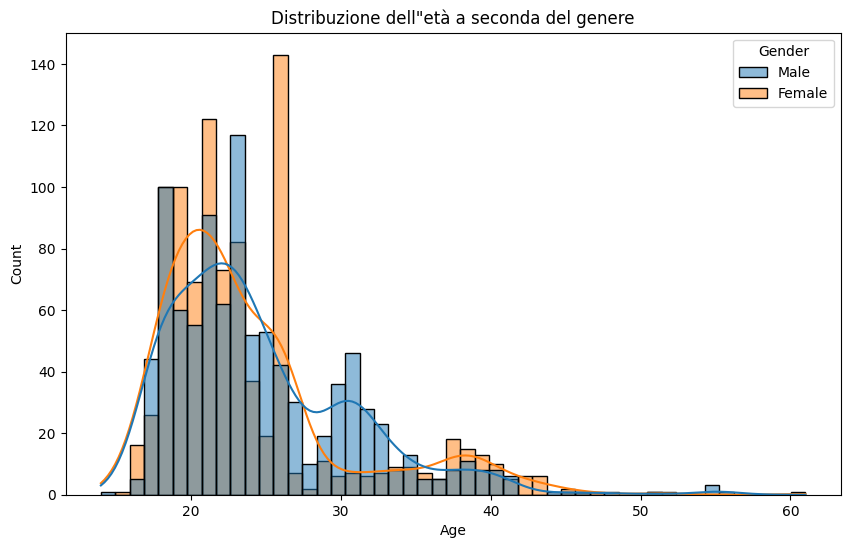

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training_print, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

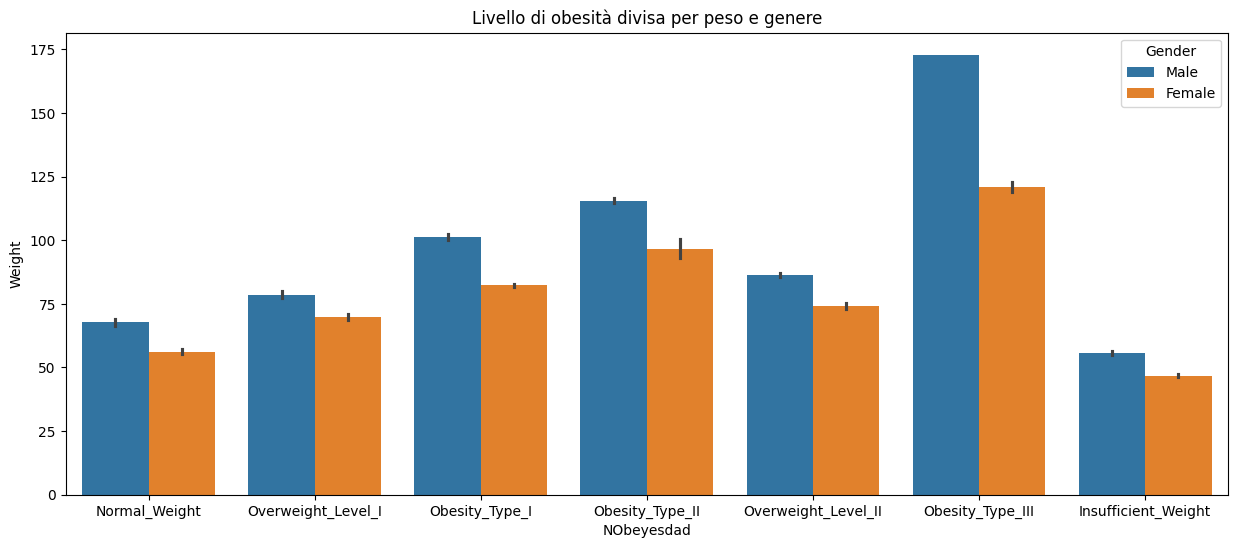

In [159]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training_print, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

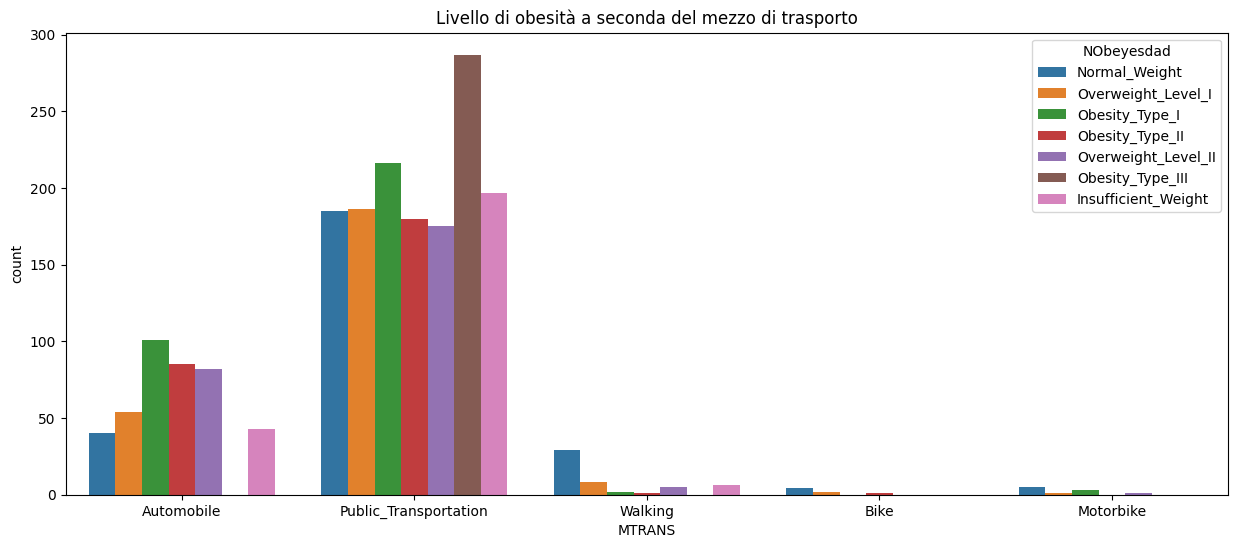

In [160]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_print, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

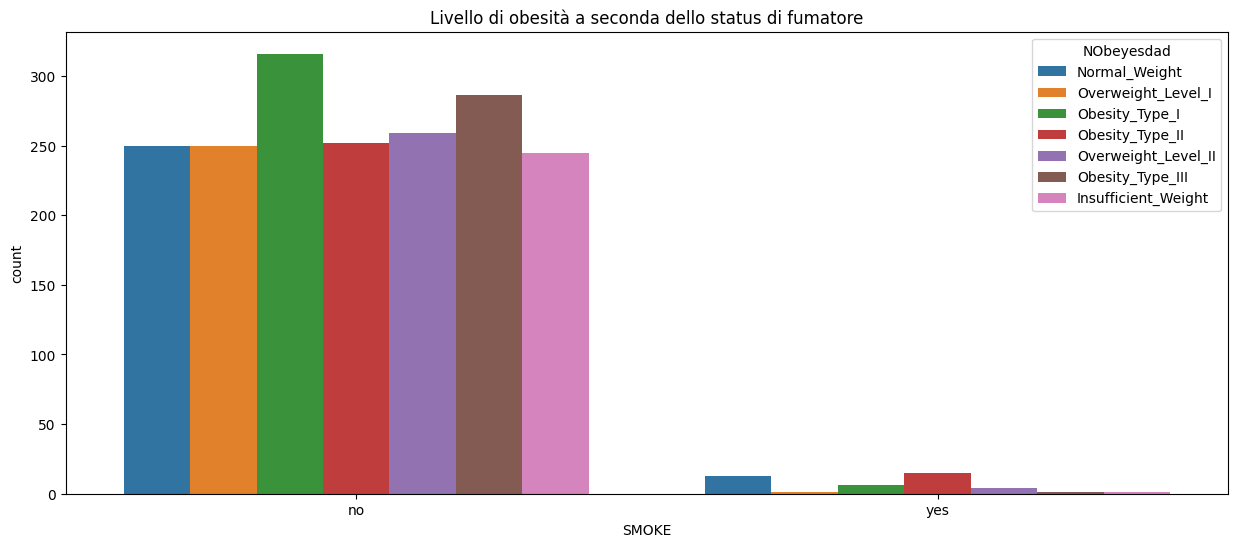

In [161]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_print, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

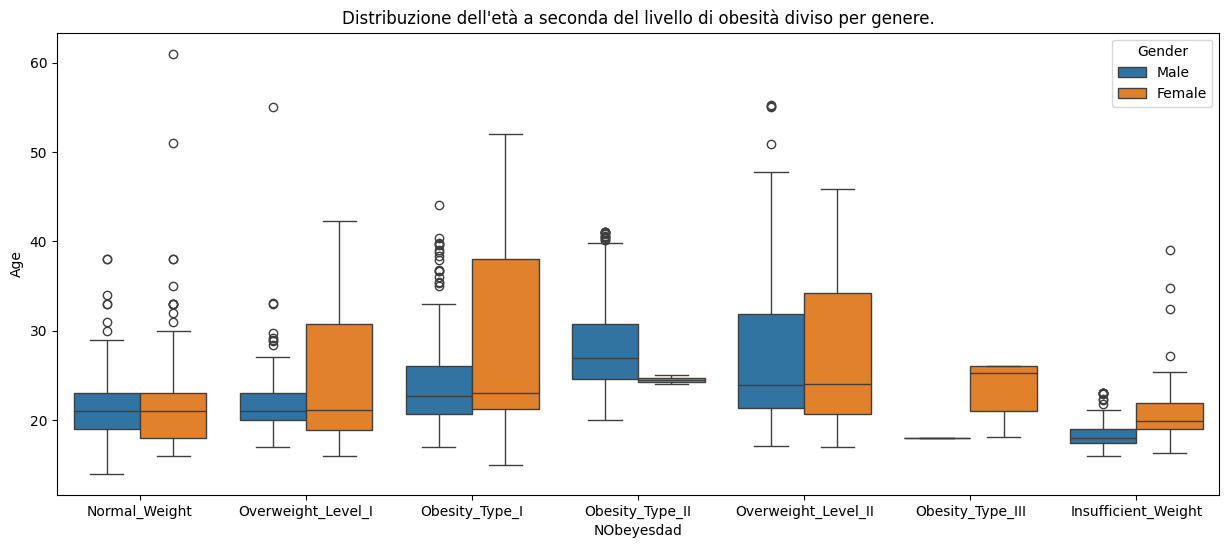

In [162]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training_print, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# **Linear Regression Implementation**

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#DATASET PREPARATION
dataset_lin_regression_train = dataset_training_ohe.copy()
dataset_lin_regression_test = dataset_test_ohe.copy()

#Train
y_train_lin = dataset_lin_regression_train.Weight
x_train_lin = dataset_lin_regression_train.drop(["Weight"], axis = 1)
x_train_lin.insert(0, "Bias", 1, allow_duplicates=False)

Y_train_lin = y_train_lin.to_numpy()
X_train_lin = x_train_lin.to_numpy()
X_train_lin = X_train_lin.astype(float)

#Test
y_test_lin = dataset_lin_regression_test.Weight
x_test_lin = dataset_lin_regression_test.drop(["Weight"], axis = 1)
x_test_lin.insert(0, "Bias", 1, allow_duplicates=False)

Y_test_lin = y_test_lin.to_numpy()
X_test_lin = x_test_lin.to_numpy()


def mse_lin(y_true, y_pred):
    #Calculate the difference between the predicted and actual values
    errors = y_true - y_pred

    #Calculate the square of the errors
    squared_errors = np.square(errors)

    #Calculate the average of the squares of the errors
    mse = np.mean(squared_errors)

    return mse

#c = (XTX)^-1XTY
c = np.linalg.pinv(X_train_lin)
c = np.dot(c,Y_train_lin)

w_lin=np.dot(X_test_lin,c)

#Calculate predictions using the trained linear model
Y_pred_lin = np.dot(X_test_lin, c)

################### MSE ###################
MSE = mse_lin(Y_test_lin, Y_pred_lin)
MSE_sk = mean_squared_error(Y_test_lin, w_lin)

print("MSE: ", MSE)
print("MSE obtained with sk: ", MSE_sk)
print('*'*50)


################### MAE ###################
MAE = np.mean(np.abs(w_lin - Y_test_lin), axis = 0)
MAE_sk = mean_absolute_error(Y_test_lin, w_lin)

print("MAE: ", MAE)
print("MAE obtained with sk: ", MAE_sk)
print('*'*50)


################### RMSE ###################
print("RMSE: ", np.sqrt(MSE))
print("RMSE obtained with sk: ", np.sqrt(MSE_sk))
print('*'*50)

MSE:  28.47330746509376
MSE obtained with sk:  28.47330746509378
**************************************************
MAE:  3.8887484975918643
MAE obtained with sk:  3.888748497591866
**************************************************
RMSE:  5.336038555435461
RMSE obtained with sk:  5.336038555435462
**************************************************


**Gradient Descent**

The Gradient Descent implementation for linear regression uses the stochastic version of the algorithm. I initialize the weights randomly and use an iterative optimization procedure to update them. At each iteration, the data is mixed and divided into mini-batches of specific size, on which I calculate the gradient and update the weights. The process continues for a predetermined number of epochs. Finally, I evaluate the model's performance by calculating the Mean Squared Error (MSE) on the test data and visualize the trend of the MSE during training via a graph.    
  
I tried different learning rate values, all with 50000 epochs and 10 batch_size:  
1) With lr=0.0001 the MSE obtained is approximately 23.17928864820591  
2) With lr=0.001 the MSE obtained is approximately 25.360251002346025

Since I shuffle the data each time, the tuning results may vary slightly with each run.

MSE obtained from our implementation: 28.358530447508794


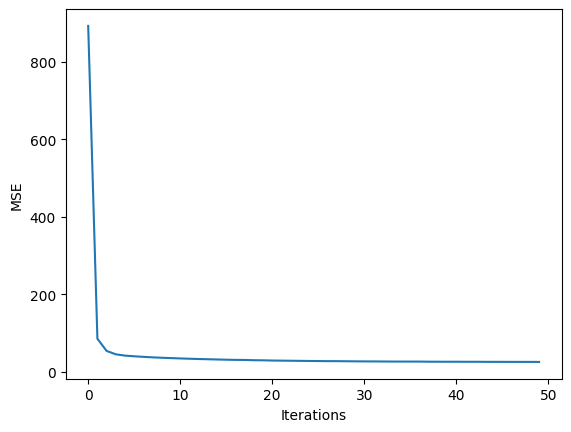

**************************************************
RMSE obtained from our implementation: 5.325272804984623


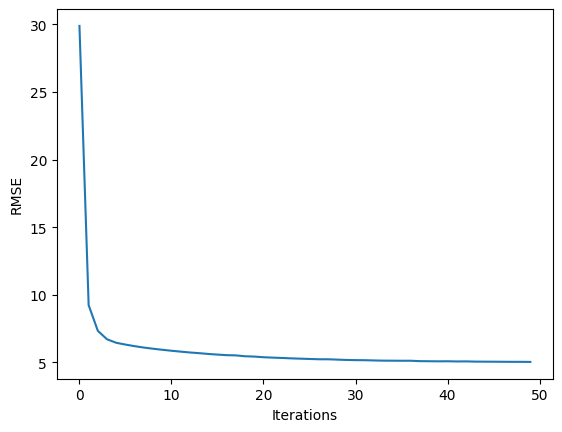

**************************************************
MAE obtained from our implementation: 3.838741869026181


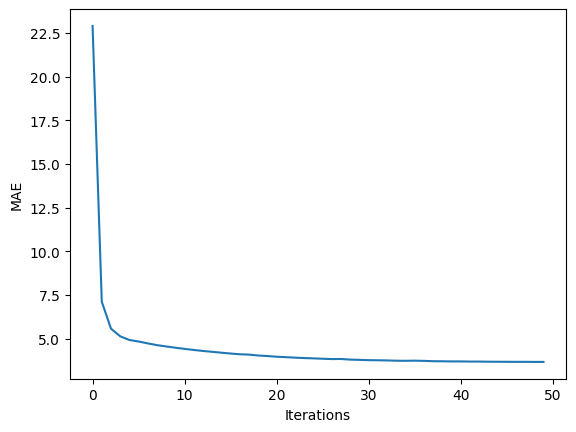

In [164]:
import matplotlib.pyplot as plt

#Train
dataset_training_gradient = dataset_training_ohe.copy()
y_gradient_train = dataset_training_gradient.Weight
x_gradient_train = dataset_training_gradient.drop(["Weight"],axis=1)
x_gradient_train.insert(0, "Bias", 1, allow_duplicates=False)

X_gradient_train = x_gradient_train.to_numpy()
Y_gradient_train = y_gradient_train.to_numpy()

#Test
dataset_test_gradient = dataset_test_ohe.copy()
y_gradient_test = dataset_test_gradient.Weight
x_gradient_test = dataset_test_gradient.drop(["Weight"],axis=1)
x_gradient_test.insert(0, "Bias", 1, allow_duplicates=False)

X_gradient_test = x_gradient_test.to_numpy()
Y_gradient_test = y_gradient_test.to_numpy()


#Print the plot
def plot_mse(mse_list):
  x=np.arange(len(mse_list))
  y=np.array(mse_list)
  plt.xlabel("Iterations")
  plt.ylabel("MSE")
  plt.plot(x,y)
  plt.show()

def plot_rmse(rmse_list):
  x=np.arange(len(rmse_list))
  y=np.array(rmse_list)
  plt.xlabel("Iterations")
  plt.ylabel("RMSE")
  plt.plot(x,y)
  plt.show()

def plot_mae(mae_list):
  x=np.arange(len(mae_list))
  y=np.array(mae_list)
  plt.xlabel("Iterations")
  plt.ylabel("MAE")
  plt.plot(x,y)
  plt.show()


def stochastic_gradient_descent(X, y, alpha=0.0001, epochs=50000, batch_size=10):
    #Initialization of weights randomly
    w = np.random.randn(X.shape[1])

    mse_list = []
    rmse_list = []
    mae_list = []

    for epoch in range(epochs):
        #Data shuffling
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, len(X), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            X_batch_t = np.transpose(X_batch)

            #Calculation of the hypothesis function
            h_w = np.dot(X_batch, w)

            #Calculation of the error
            errors = h_w - y_batch

            #Gradient calculation
            gradient = np.dot(X_batch_t, errors) / batch_size

            #Weight update
            w = w - alpha*gradient

        #MSE calculation every 1000 epochs
        if (epoch % 1000) == 0 :
          mse = mean_squared_error(np.dot(X, w), y)
          mae = mean_absolute_error(np.dot(X, w), y)
          mse_list.append(mse)
          rmse_list.append(np.sqrt(mse))
          mae_list.append(mae)

    return w, mse_list, rmse_list, mae_list

#Model training
w_final, mse_list, rmse_list, mae_list = stochastic_gradient_descent(X_gradient_train, Y_gradient_train, alpha=0.0001, epochs=50000, batch_size=10)

################### MSE ###################
mse_gradient = mean_squared_error(np.dot(X_gradient_test, w_final), Y_gradient_test)
print("MSE obtained from our implementation:", mse_gradient)
plot_mse(mse_list)
print('*'*50)

################### RMSE ###################
print("RMSE obtained from our implementation:", np.sqrt(mse_gradient))
plot_rmse(rmse_list)
print('*'*50)

################### MAE ###################
mae_gradient = mean_absolute_error(np.dot(X_gradient_test, w_final), Y_gradient_test)
print("MAE obtained from our implementation:", mae_gradient)
plot_mae(mae_list)


**Gradient Descent with Sklearn**

In [165]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#DATA PREPARATION
dataset_test_gradient_sk = dataset_test_ohe.copy()
dataset_training_gradient_sk = dataset_training_ohe.copy()

#Train
y_gradient_train_sk = dataset_training_gradient_sk.Weight
x_gradient_train_sk = dataset_training_gradient_sk.drop(["Weight"],axis=1)
x_gradient_train_sk.insert(0, "Bias", 1, allow_duplicates=False)

X_gradient_train_sk = x_gradient_train_sk.to_numpy()
Y_gradient_train_sk = y_gradient_train_sk.to_numpy()

#Test
x_gradient_test_sk = dataset_test_gradient_sk.drop(["Weight"],axis=1)
x_gradient_test_sk.insert(0, "Bias", 1, allow_duplicates=False)

X_gradient_test_sk = x_gradient_test_sk.to_numpy()


#Create and train the SGD regressor with SKlearn
regressor_sklearn = make_pipeline(StandardScaler(),SGDRegressor(max_iter=500000, learning_rate='constant', eta0=0.0001, random_state=42, penalty=None))
regressor_sklearn.fit(X_gradient_train_sk, Y_gradient_train_sk)

#Make predictions with the model trained on test data
Y_pred_gradient_sk = regressor_sklearn.predict(X_gradient_test_sk)

################### MSE SKLEARN ###################
mse_sk = mean_squared_error(Y_gradient_test, Y_pred_gradient_sk)
print("MSE obtained with SKlearn's SGDRegressor:", mse_sk)
print('*'*50)

################### MAE SKLEARN ###################
mae_sk = mean_absolute_error(Y_gradient_test, Y_pred_gradient_sk)
print("MAE obtained with SKlearn's SGDRegressor:", mae_sk)
print('*'*50)

################### RMSE SKLEARN ###################
print("RMSE obtained with SKlearn's SGDRegressor:", np.sqrt(mse_sk))
print('*'*50)

MSE obtained with SKlearn's SGDRegressor: 28.489162736202314
**************************************************
MAE obtained with SKlearn's SGDRegressor: 3.880986794935077
**************************************************
RMSE obtained with SKlearn's SGDRegressor: 5.3375240267564426
**************************************************


# **Learning Decison Tree Implementation**

The dataset was prepared by replacing non-numeric values ​​with corresponding numeric values. The tree is built recursively based on the attribute that provides the greatest information gain at each node. Examples are split based on the values ​​of the selected attribute, and the process continues until all examples in a node belong to the same class or there are no more attributes available. Next, the model is evaluated using several metrics.

In [166]:
import math
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             precision_recall_curve,
                             PrecisionRecallDisplay,
                             f1_score,
                             RocCurveDisplay,
                             roc_curve,
                             roc_auc_score,
                             auc)


#Create dictionaries for each non-numeric field in the dataset
Gender_map = {
    "Male": 0, "Female": 1
}
YesNo_map = {
    "yes": 0, "no": 1
}
CAEC_map = {
    "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
}
CALC_map = {
    "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
}
MTRANS_map = {
    "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
}
NObeyesdad_map = {
    "Overweight_Level_I":0 , "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1,
    "Obesity_Type_III": 1, "Normal_Weight": 0, "Insufficient_Weight": 0
}

#DATASET PREPARATION
dataset_training_ldt = dataset_training.copy()
dataset_test_ldt = dataset_test.copy()

#Train
dataset_training_ldt.NObeyesdad.replace(NObeyesdad_map, inplace=True)
dataset_training_ldt.Gender.replace(Gender_map, inplace=True)
dataset_training_ldt.family_history_with_overweight.replace(YesNo_map, inplace=True)
dataset_training_ldt.FAVC.replace(YesNo_map, inplace=True)
dataset_training_ldt.CAEC.replace(CAEC_map, inplace=True)
dataset_training_ldt.SMOKE.replace(YesNo_map, inplace=True)
dataset_training_ldt.SCC.replace(YesNo_map, inplace=True)
dataset_training_ldt.CALC.replace(CALC_map, inplace=True)
dataset_training_ldt.MTRANS.replace(MTRANS_map, inplace=True)

x_train_ldt = dataset_training_ldt.drop(["NObeyesdad"], axis = 1)
y_train_ldt = dataset_training_ldt.NObeyesdad
X_train_ldt = x_train_ldt.to_numpy()
Y_train_ldt = y_train_ldt.to_numpy()

#Test
dataset_test_ldt.NObeyesdad.replace(NObeyesdad_map, inplace=True)
dataset_test_ldt.Gender.replace(Gender_map, inplace=True)
dataset_test_ldt.family_history_with_overweight.replace(YesNo_map, inplace=True)
dataset_test_ldt.FAVC.replace(YesNo_map, inplace=True)
dataset_test_ldt.CAEC.replace(CAEC_map, inplace=True)
dataset_test_ldt.SMOKE.replace(YesNo_map, inplace=True)
dataset_test_ldt.SCC.replace(YesNo_map, inplace=True)
dataset_test_ldt.CALC.replace(CALC_map, inplace=True)
dataset_test_ldt.MTRANS.replace(MTRANS_map, inplace=True)

x_test_ldt = dataset_test_ldt.drop(["NObeyesdad"], axis = 1)
y_test_ldt = dataset_test_ldt.NObeyesdad
X_test_ldt = x_test_ldt.to_numpy()
Y_test_ldt = y_test_ldt.to_numpy()


#Create dictionaries to split tree branches
ldt_list = list(range(0,200,1))
spli_list = [i / 100 for i in ldt_list]

diz = {
    0: [0,1],
    1: list(range(0,100,1)),
    2: spli_list,
    3: list(range(0,180,1)),
    4: [0,1],
    5: [0,1],
    6: [0,2,3],
    7: [0,2,3],
    8: [0,1,2,3],
    9: [0,1],
    10: [0,1,2.5],
    11: [0,1],
    12: [0,1,2],
    13: [0,1],
    14: [0,1,2,3],
    15: [0,1,2,3,4]
}

attributes = {
    0: "Gender",
    1: "Age",
    2: "Height",
    3: "weight",
    4: "family_history_with_overweight",
    5: "FAVC",
    6: "FCVC",
    7: "NCP",
    8: "CAEC",
    9: "SMOKE",
    10: "CH2O",
    11: "SCC",
    12: "FAF",
    13: "TUE",
    14: "CALC",
    15: "MTRANS",
    16: "NObeyesdad"
}



class TreeNode:

    def __init__(self, examples, AttributesAvailable, OutcomeFather):
        #Keep track in each node of the examples used to split it into multiple branches and available attributes
        self.examples = examples
        self.AttributesAvailable = AttributesAvailable

        #If examples == 0 set the most frequent one among the parent's examples
        if(len(self.examples)==0):
            self.foglia = True
            self.outcome = OutcomeFather
            return

        MajorityOutcome = TreeNode.most_occurrence(self.examples)
        if(len(self.AttributesAvailable)==0):
            self.outcome = MajorityOutcome
            self.foglia = True
            return

        #If the node contains only examples with the same outcome then set it to a leaf and save the outcome
        elif(self.estFoglia()):
            self.outcome = MajorityOutcome
            self.foglia = True
            return

        else:
            #If the node does not contain only examples with the same outcome then it is not a leaf
            self.foglia = False
            self.attribute = self.findAttribute() #Attribute with the highest Gain
            self.AttributesAvailable.remove(self.attribute) #Remove this attribute
            self.branches = []
            branch_examples, self.listValues, _ = TreeNode.SplitAttribute(self.examples,self.attribute)

            for branch in range(len(branch_examples)):
                self.branches.append(TreeNode(branch_examples[branch], AttributesAvailable, MajorityOutcome))
        return


    #Calculates the attribute with the highest entropy gain and returns it
    def findAttribute(self):
        Gain_list = []
        for att in self.AttributesAvailable:
            Gain_list.append(self.calculateGain(att))
        return self.AttributesAvailable[Gain_list.index(max(Gain_list))]


    def infer(self, x):
        if(self.foglia):
            return self.outcome
        else:
            #Directing the search to the right branch
            for i in reversed(range(len(self.listValues))):
                if(x[self.attribute]>=self.listValues[i]):
                    return self.branches[i].infer(x)


    #Calculates the entropy of a subdivision from the given attribute
    def calculateGain(self, attribute):
        Examples = len(self.examples)
        branch_examples, _, positive = TreeNode.SplitAttribute(self.examples,attribute)
        x = positive/Examples

        if x == 0 or x == 1:
            B = 0
        else:
            B = -((x * math.log2(x))+((1-x) * math.log2(1-x)))

        remainder = 0
        #Calculate the Information Gain
        for i in branch_examples:
            n_Examples = len(i)
            y = n_Examples/Examples
            count_P = 0
            count_N = 0
            for j in i:
                if(j[16] == 0):
                    count_P += 1
                else:
                    count_N += 1
            if(n_Examples==0):
                remainder += 0
            else:
                z = count_P/n_Examples
                if(z == 1):
                    remainder += 0
                elif(z == 0):
                    remainder += 0
                else:
                    remainder += y * (-((z*math.log2(z)) + ((1-z)*math.log2(1-z))))

        res = B - remainder
        return res


    @staticmethod
    def SplitAttribute(examples, attribute):

        branch_examples = []
        listValues = []

        for i in range(len(diz[attribute])-1):

            listValues.append(diz[attribute][i])
            list_examples = []

            for r in examples:
                if(r[attribute] >= diz[attribute][i] and r[attribute] < diz[attribute][i+1]):
                    list_examples.append(r)

            branch_examples.append(list_examples)

        #Count the number of occurrences of positive outcomes in the examples
        list_examples = []
        p = 0
        listValues.append(diz[attribute][-1])
        for j in examples:
            if(j[attribute] >= diz[attribute][-1]):
                    list_examples.append(j)
            if(j[16] == 0):
                p += 1
        branch_examples.append(list_examples)

        return branch_examples, listValues, p


    @staticmethod
    def most_occurrence(examples):
        countP = 0
        countN = 0
        for i in examples:
            if(i[16] == 0):
                countP += 1
            else:
                countN += 1
        if countP >= countN:
            return 0
        else:
            return 1


    def estFoglia(self):
      outcome = self.examples[0][16]
      for i in self.examples:
          if(i[16] != outcome):
              return False
      return True


**Model Testing and Analysis**

Accuracy on the test set: 91.50943396226415
**************************************************
F1 Score: 90.32258064516128
**************************************************
False Positives: 6
False Negatives: 12


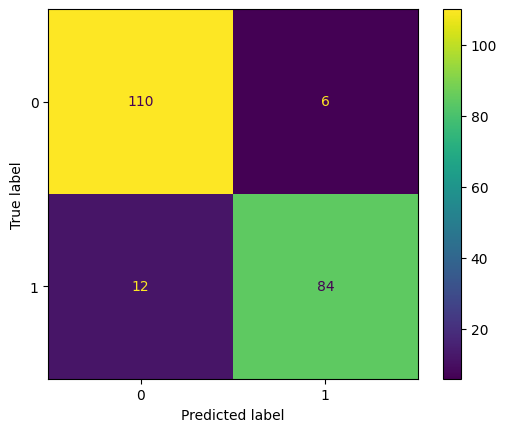

**************************************************
Precision: 93.33333333333333
Recall: 87.5


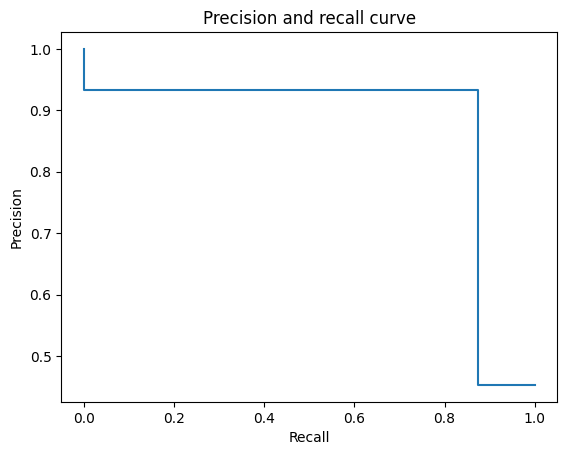

**************************************************


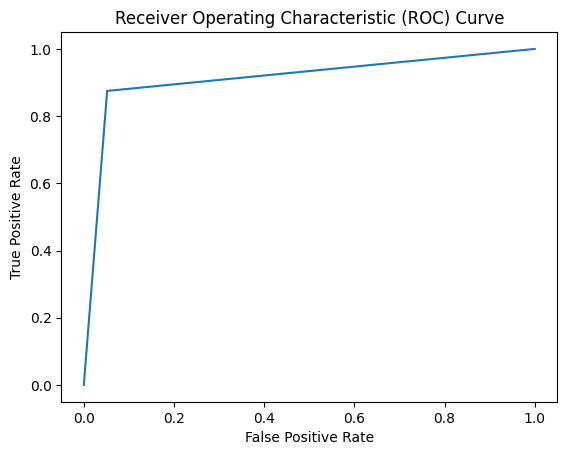

**************************************************
Area Under the ROC Curve (AUC): 91.16379310344827


In [167]:
#Model training
att_list = list(range(16))
dataset_list = [row.tolist() for index, row in dataset_training_ldt.iterrows()]
root = TreeNode(dataset_list, att_list, 1)
list_dt = [row.tolist() for index, row in dataset_test_ldt.iterrows()]

Y_pred_ldt = []
for i in range(len(list_dt)):
    Y_pred_ldt.append(root.infer(list_dt[i]))
Y_pred_ldt = np.array(Y_pred_ldt)

################### Test Accuracy ###################
acc_ldt = accuracy_score(Y_test_ldt, Y_pred_ldt)

print("Accuracy on the test set:", acc_ldt*100)
print('*'*50)


################### F1 Score ###################
f1_ldt = f1_score(Y_test_ldt, Y_pred_ldt)

print("F1 Score:", f1_ldt*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_ldt = confusion_matrix(Y_test_ldt, Y_pred_ldt)

#Extract the values ​​from the confusion matrix
_, fp_ldt, fn_ldt, _ = cm_ldt.ravel()

print("False Positives:", fp_ldt)
print("False Negatives:", fn_ldt)

cm_plt_ldt = ConfusionMatrixDisplay(confusion_matrix=cm_ldt)
cm_plt_ldt.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_ldt = precision_score(Y_test_ldt, Y_pred_ldt)
recall_ldt = recall_score(Y_test_ldt, Y_pred_ldt)

print("Precision:", precision_ldt*100)
print("Recall:", recall_ldt*100)

#Precision and recall curve
precision_ldt, recall_ldt, _ = precision_recall_curve(Y_test_ldt, Y_pred_ldt)

display_ldt = PrecisionRecallDisplay(precision=precision_ldt, recall=recall_ldt)
display_ldt.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_ldt, tpr_ldt, _ = roc_curve(Y_test_ldt, Y_pred_ldt)

#View the ROC curve
roc_display_ldt = RocCurveDisplay(fpr=fpr_ldt, tpr=tpr_ldt)
roc_display_ldt.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_ldt = roc_auc_score(Y_test_ldt, Y_pred_ldt)
print("Area Under the ROC Curve (AUC):", roc_auc_ldt*100)


**Comparison of Learning Decison Tree with Sklearn**

Accuracy obtained with SKlearn: 98.58490566037736
**************************************************
F1 Score obtained with SKlearn: 98.42931937172776
**************************************************
False Positives obtained with SKlearn: 1
False Negatives obtained with SKlearn: 2


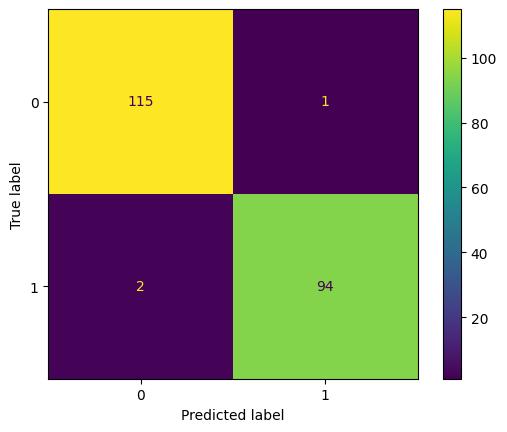

**************************************************
Precision obtained with SKlearn: 98.94736842105263
Recall obtained with SKlearn: 97.91666666666666


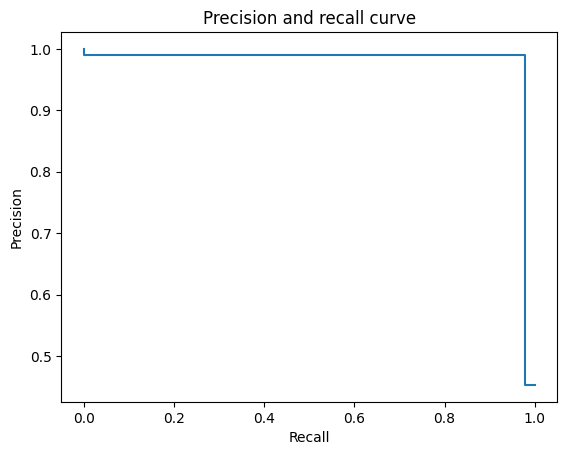

**************************************************


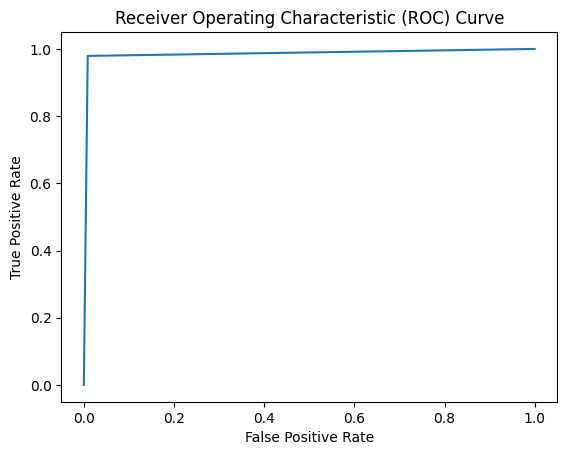

**************************************************
Area Under the ROC Curve (AUC) obtained with SKlearn: 98.52729885057471


In [168]:
from sklearn.tree import DecisionTreeClassifier

x_train_ldt_sk = dataset_training_ldt.drop(["NObeyesdad"], axis = 1)
y_train_ldt_sk = dataset_training_ldt.NObeyesdad
X_train_ldt_sk = x_train_ldt_sk.to_numpy()
Y_train_ldt_sk = y_train_ldt_sk.to_numpy()

x_test_ldt_sk = dataset_test_ldt.drop(["NObeyesdad"], axis = 1)
X_test_ldt_sk = x_test_ldt_sk.to_numpy()

#Let's create and train a model with scikit-learn
model = DecisionTreeClassifier()
model.fit(X_train_ldt_sk, Y_train_ldt_sk)

#Make predictions with the model trained on test data
Y_pred_ldt_sk = model.predict(X_test_ldt_sk)


################### Test Accuracy ###################
acc_ldt_sk = accuracy_score(Y_test_ldt, Y_pred_ldt_sk)

print("Accuracy obtained with SKlearn:", acc_ldt_sk*100)
print('*'*50)


################### F1 Score ###################
f1_ldt_sk = f1_score(Y_test_ldt, Y_pred_ldt_sk)

print("F1 Score obtained with SKlearn:", f1_ldt_sk*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_ldt_sk = confusion_matrix(Y_test_ldt, Y_pred_ldt_sk)

#Extract the values ​​from the confusion matrix
_, fp_ldt_sk, fn_ldt_sk, _ = cm_ldt_sk.ravel()

print("False Positives obtained with SKlearn:", fp_ldt_sk)
print("False Negatives obtained with SKlearn:", fn_ldt_sk)

cm_plt_ldt_sk = ConfusionMatrixDisplay(confusion_matrix=cm_ldt_sk)
cm_plt_ldt_sk.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_ldt_sk = precision_score(Y_test_ldt, Y_pred_ldt_sk)
recall_ldt_sk = recall_score(Y_test_ldt, Y_pred_ldt_sk)

print("Precision obtained with SKlearn:", precision_ldt_sk*100)
print("Recall obtained with SKlearn:", recall_ldt_sk*100)

#Precision and recall curve
precision_ldt_sk, recall_ldt_sk, _ = precision_recall_curve(Y_test_ldt, Y_pred_ldt_sk)

display_ldt_sk = PrecisionRecallDisplay(precision=precision_ldt_sk, recall=recall_ldt_sk)
display_ldt_sk.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_ldt_sk, tpr_ldt_sk, _ = roc_curve(Y_test_ldt, Y_pred_ldt_sk)

#View the ROC curve
roc_display_ldt_sk = RocCurveDisplay(fpr=fpr_ldt_sk, tpr=tpr_ldt_sk)
roc_display_ldt_sk.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_ldt_sk = roc_auc_score(Y_test_ldt, Y_pred_ldt_sk)
print("Area Under the ROC Curve (AUC) obtained with SKlearn:", roc_auc_ldt_sk*100)



# **Logistic Regression Implementation**

The logistic regression implementation uses the stochastic gradient algorithm. The dataset was prepared by replacing non-numeric values ​​with corresponding numeric values. The model is trained iteratively by updating the weights based on the gradient of the loss function, calculated using the sigmoid function. Finally, the model is evaluated using several parameters.
  
I tried different learning rate values:  
1) With lr=0.0001 the Accuracy is approximately 91.50943396226415  
2) With lr=0.001 the Accuracy is approximately 94.81132075471697   
3) With lr=0.01 the Accuracy is approximately 95.75471698113208  
4) With lr=0.1 the Accuracy is approximately 95.75471698113208  
5) With lr=1 the Accuracy is approximately 96.22641509433963  
6) With lr=10 the Accuracy is approximately 95.28301886792453  
7) With lr=100 the Accuracy is approximately 96.22641509433963  
8) With lr=100 the Accuracy is approximately 95.28301886792453

Since I shuffle the data each time, the tuning results may vary slightly with each run.

In [169]:

my_dataset_test = dataset_test.copy()
my_dataset_training = dataset_training.copy()

dataset_training_ohe = dataset_training_ohe.copy()
dataset_test_ohe = dataset_test_ohe.copy()


dictionary = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": 0,
    "Overweight_Level_II": 0,
    "Obesity_Type_I": 1,
    "Obesity_Type_II": 1,
    "Obesity_Type_III": 1
}

columns_to_drop = ['NObeyesdad_Obesity_Type_I',
                   'NObeyesdad_Obesity_Type_II',
                   'NObeyesdad_Obesity_Type_III',
                   'NObeyesdad_Overweight_Level_I',
                   'NObeyesdad_Overweight_Level_II',
                   'NObeyesdad_Insufficient_Weight',
                   'NObeyesdad_Normal_Weight']

#DATASET PREPARATION
my_dataset_training.replace(to_replace = dictionary, inplace=True)
my_dataset_test.replace(to_replace = dictionary, inplace=True)

#Train
y_train_logistic = my_dataset_training.NObeyesdad
x_train_logistic = dataset_training_ohe.drop(columns_to_drop ,axis=1)
X_train_logistic = x_train_logistic.to_numpy()
Y_train_logistic = y_train_logistic.to_numpy()

#Test
y_test_logistic = my_dataset_test.NObeyesdad
x_test_logistic = dataset_test_ohe.drop(columns_to_drop ,axis=1)
X_test_logistic = x_test_logistic.to_numpy()
Y_test_logistic = y_test_logistic.to_numpy()


def plot_acc(acc_list):
  x=np.arange(len(acc_list))
  y=np.array(acc_list)*100
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.plot(x,y)
  plt.show()

#Implementation of the threshold function, which divides the input into two classes: those with value>=value and those smaller
def threshold(res,value):
  binary_output=np.copy(res)
  binary_output[binary_output >= value] = 1
  binary_output[binary_output < value] = 0
  return binary_output

def sigmoid(z):
  z = np.array(z, dtype=np.float64)
  z=np.clip(z,-700,700)
  res = 1/(1+np.exp(-z))
  return res

def predict_logistic(test,w):
  return threshold(sigmoid(np.dot(test,w)),0.5)

def logistic_regression(X, y, lr = 1, epochs=20000, batch_size=10):
    #Initialization of weights randomly
    w = np.random.randn(X.shape[1])

    acc_list = []

    for epoch in range(epochs):
        #Data shuffling
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, len(X), batch_size):
            #Decay of the learning rate
            alpha = (1000 *lr) / (1000 + epoch*batch_size + i)

            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            X_batch_t = np.transpose(X_batch)

            #Calculation of the hypothesis function
            h = sigmoid(np.dot(X_batch, w))

            #Calculation of the error
            errors = h - y_batch

            #Gradient calculation
            gradient = np.dot(X_batch_t, errors)

            #Weight update
            w = w - alpha*gradient

        #Accuracy calculation every 100 epochs
        if(epoch % 100) == 0:
            acc = accuracy_score(y_batch, threshold(h, 0.5))
            acc_list.append(acc)

    return w, acc_list


**Model Testing and Analysis**


Accuracy on the test set: 97.16981132075472
**************************************************
F1 Score: 96.90721649484536
**************************************************
False Positives: 4
False Negatives: 2


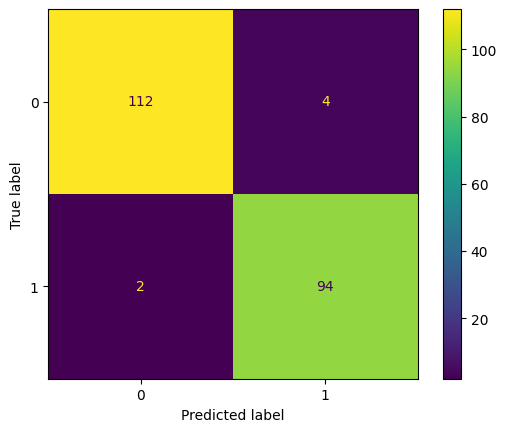

**************************************************
Precision: 95.91836734693877
Recall: 97.91666666666666


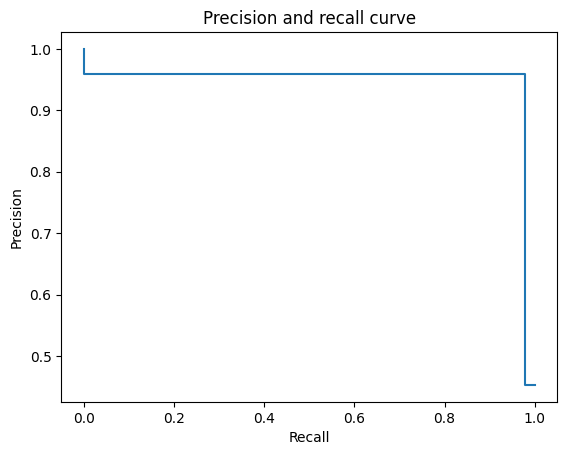

**************************************************


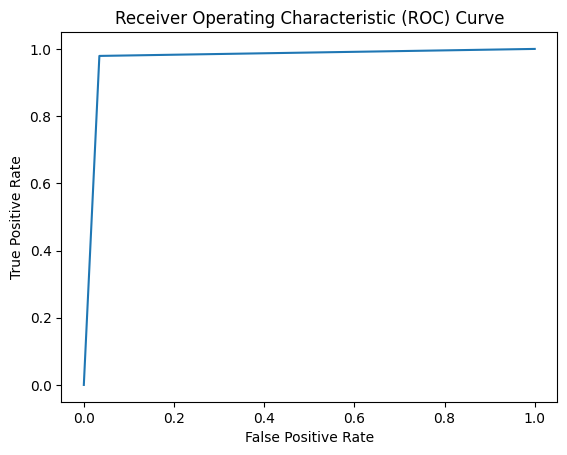

**************************************************
Area Under the ROC Curve (AUC): 97.23419540229885
**************************************************


In [170]:
#Model training
w_final, acc_list = logistic_regression(X_train_logistic, Y_train_logistic, lr = 1, epochs=20000, batch_size=10)

################### Test Accuracy ###################
Y_pred_logistic = predict_logistic(X_test_logistic, w_final)
acc_logistic = accuracy_score(Y_test_logistic, Y_pred_logistic)

print("Accuracy on the test set:", acc_logistic*100)
# plot_acc(acc_list)
print('*'*50)


################### F1 Score ###################
f1_logistic = f1_score(Y_test_logistic, Y_pred_logistic)

print("F1 Score:", f1_logistic*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_logistic = confusion_matrix(Y_test_logistic, Y_pred_logistic)

#Extract the values ​​from the confusion matrix
tn_logistic, fp_logistic, fn_logistic, tp_logistic = cm_logistic.ravel()

print("False Positives:", fp_logistic)
print("False Negatives:", fn_logistic)

cm_plt_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
cm_plt_logistic.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_logistic = precision_score(Y_test_logistic, Y_pred_logistic)
recall_logistic = recall_score(Y_test_logistic, Y_pred_logistic)

print("Precision:", precision_logistic*100)
print("Recall:", recall_logistic*100)

#Precision and recall curve
precision_logistic, recall_logistic, _ = precision_recall_curve(Y_test_logistic, Y_pred_logistic)

display_logistic = PrecisionRecallDisplay(precision=precision_logistic, recall=recall_logistic)
display_logistic.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test_logistic, Y_pred_logistic)

#View the ROC curve
roc_display_logistic = RocCurveDisplay(fpr=fpr_logistic, tpr=tpr_logistic)
roc_display_logistic.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
print("Area Under the ROC Curve (AUC):", roc_auc_logistic*100)
print('*'*50)

**Comparison of Logistic Regression with Sklearn**

Accuracy obtained with SKlearn:  96.69811320754717
**************************************************
F1 Score obtained with SKlearn: 96.37305699481865
**************************************************
False Positives obtained with SKlearn: 4
False Negatives obtained with SKlearn: 3


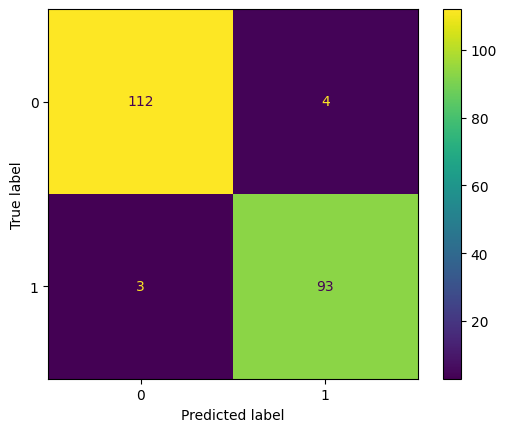

**************************************************
Precision obtained with SKlearn: 95.87628865979381
Recall obtained with SKlearn: 96.875


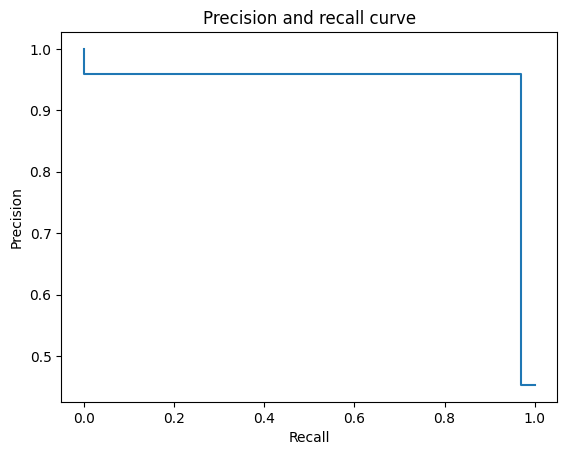

**************************************************


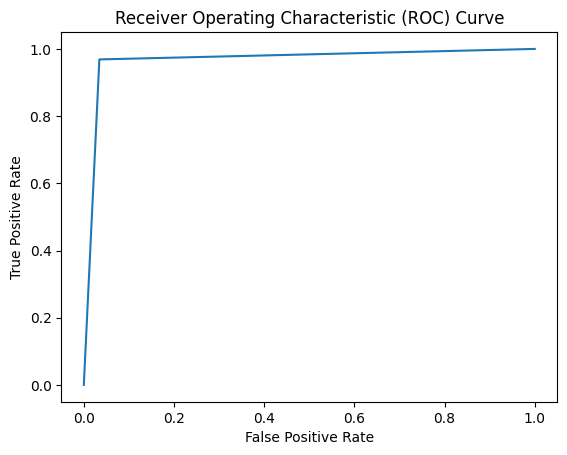

**************************************************
Area Under the ROC Curve (AUC) obtained with SKlearn: 96.71336206896552
**************************************************


In [171]:
from sklearn.linear_model import LogisticRegression

my_dataset_test_sk = dataset_test.copy()
my_dataset_training_sk = dataset_training.copy()

dataset_training_ohe_sk = dataset_training_ohe.copy()
dataset_test_ohe_sk = dataset_test_ohe.copy()

#DATASET PREPARATION
my_dataset_training_sk.replace(to_replace = dictionary, inplace=True)
my_dataset_test_sk.replace(to_replace = dictionary, inplace=True)

#Train
y_train_logistic_sk = my_dataset_training_sk.NObeyesdad
x_train_logistic_sk = dataset_training_ohe_sk.drop(columns_to_drop ,axis=1)
X_train_logistic_sk = x_train_logistic_sk.to_numpy()
Y_train_logistic_sk = y_train_logistic_sk.to_numpy()

#Test
x_test_logistic_sk = dataset_test_ohe_sk.drop(columns_to_drop ,axis=1)
X_test_logistic_sk = x_test_logistic_sk.to_numpy()


#Let's create and train the Logistic regressor with scikit-learn
model = LogisticRegression(max_iter=200000, solver = "saga", C = 10)
model.fit(X_train_logistic_sk, Y_train_logistic_sk)

#Make predictions with the model trained on test data
Y_pred_logistic_sk = model.predict(X_test_logistic_sk)


################### Test Accuracy ###################
acc_logistic_sk = accuracy_score(Y_test_logistic, Y_pred_logistic_sk)
print("Accuracy obtained with SKlearn: ", acc_logistic_sk*100)
print('*'*50)


################### F1 Score ###################
f1_logistic_sk = f1_score(Y_test_logistic, Y_pred_logistic_sk)

print("F1 Score obtained with SKlearn:", f1_logistic_sk*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_logistic_sk = confusion_matrix(Y_test_logistic, Y_pred_logistic_sk)

#Extract the values ​​from the confusion matrix
tn_logistic_sk, fp_logistic_sk, fn_logistic_sk, tp_logistic_sk = cm_logistic_sk.ravel()

print("False Positives obtained with SKlearn:", fp_logistic_sk)
print("False Negatives obtained with SKlearn:", fn_logistic_sk)

cm_logistic_sk_plt = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_sk)
cm_logistic_sk_plt.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_logistic_sk = precision_score(Y_test_logistic, Y_pred_logistic_sk)
recall_logistic_sk = recall_score(Y_test_logistic, Y_pred_logistic_sk)

print("Precision obtained with SKlearn:", precision_logistic_sk*100)
print("Recall obtained with SKlearn:", recall_logistic_sk*100)

#Precision and recall curve
precision_logistic_sk, recall_logistic_sk, _ = precision_recall_curve(Y_test_logistic, Y_pred_logistic_sk)

display_logistic_sk = PrecisionRecallDisplay(precision=precision_logistic_sk, recall=recall_logistic_sk)
display_logistic_sk.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_logistic_sk, tpr_logistic_sk, _ = roc_curve(Y_test_logistic, Y_pred_logistic_sk)

#View the ROC curve
roc_display_logistic_sk = RocCurveDisplay(fpr=fpr_logistic_sk, tpr=tpr_logistic_sk)
roc_display_logistic_sk.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_logistic_sk = auc(fpr_logistic_sk, tpr_logistic_sk)
print("Area Under the ROC Curve (AUC) obtained with SKlearn:", roc_auc_logistic_sk*100)
print('*'*50)

# **K-Nearest-Neighbor Implementation**

In the implementation of k-Nearest Neighbors (KNN) we prepare the data by normalizing them, then train the model on training data, carry out inference on test data using the distance function between points and evaluate the performance of the model using different metrics.  
  
I tried different K values:  
1) With k=1 the Accuracy obtained is approximately 96.2085308056872  
2) With k=3 the Accuracy obtained is approximately 95.73459715639811  
3) With k=5 the Accuracy obtained is approximately 96.2085308056872  
4) With k=17 the Accuracy obtained is approximately 92.89099526066352  
5) With k=127 the Accuracy obtained is approximately 84.83412322274881  
  
Obviously the more k increases the worse the result. The best range is between 3 and just over 5.

Since I shuffle the data each time, the tuning results may vary slightly with each run.

In [172]:
#DATASET PREPARATION
dataset_test_knn = dataset_test.copy()
dataset_training_knn = dataset_training.copy()

#Train
dataset_training_knn.NObeyesdad.replace(NObeyesdad_map, inplace=True)
dataset_training_knn.Gender.replace(Gender_map, inplace=True)
dataset_training_knn.family_history_with_overweight.replace(YesNo_map, inplace=True)
dataset_training_knn.FAVC.replace(YesNo_map, inplace=True)
dataset_training_knn.CAEC.replace(CAEC_map, inplace=True)
dataset_training_knn.SMOKE.replace(YesNo_map, inplace=True)
dataset_training_knn.SCC.replace(YesNo_map, inplace=True)
dataset_training_knn.CALC.replace(CALC_map, inplace=True)
dataset_training_knn.MTRANS.replace(MTRANS_map, inplace=True)

x_training_knn = dataset_training_knn.drop(['NObeyesdad'],axis=1)
y_training_knn = dataset_training_knn.NObeyesdad
X_training_knn = x_training_knn.to_numpy()
Y_training_knn = y_training_knn.to_numpy()
X_training_knn = np.delete(X_training_knn, 0, axis=0)
Y_training_knn = np.delete(Y_training_knn, 0, axis=0)


#Test
dataset_test_knn.NObeyesdad.replace(NObeyesdad_map, inplace=True)
dataset_test_knn.Gender.replace(Gender_map, inplace=True)
dataset_test_knn.family_history_with_overweight.replace(YesNo_map, inplace=True)
dataset_test_knn.FAVC.replace(YesNo_map, inplace=True)
dataset_test_knn.CAEC.replace(CAEC_map, inplace=True)
dataset_test_knn.SMOKE.replace(YesNo_map, inplace=True)
dataset_test_knn.SCC.replace(YesNo_map, inplace=True)
dataset_test_knn.CALC.replace(CALC_map, inplace=True)
dataset_test_knn.MTRANS.replace(MTRANS_map, inplace=True)

x_test_knn = dataset_test_knn.drop(['NObeyesdad'],axis=1)
X_test_knn = np.delete(x_test_knn, 0, axis=0)
y_test_knn = dataset_test_knn.NObeyesdad
Y_test_knn = np.delete(y_test_knn, 0, axis=0)


def K_Nearest_Neighbor(x, dataset, k, y):
    distance = []
    for i in dataset:
        distance.append(distance_among_points(tuple(x), tuple(i)))
    indexes = np.argsort(distance)
    dataset = dataset[indexes]
    count_0 = 0
    count_1 = 0
    y = y[indexes]
    for i in range(k):
        if(y[i] == 0):
            count_0 += 1
        else:
            count_1 += 1
    if count_0 > count_1:
        return 0
    else:
        return 1


def distance_among_points(point_1, point_2):
    if len(point_1) != len(point_2):
        raise ValueError("The two points must be the same size.")

    squared_distance = sum((p - q) ** 2 for p, q in zip(point_1, point_2))
    distance = math.sqrt(squared_distance)
    return distance

#Need to normalize the data set values
statistics = x_training_knn.describe()
statistics = statistics.to_numpy()
average = statistics[1,:]
standard_deviation = statistics[2,:]

#Data Normalization Train
for i in X_training_knn:
    for j in range(len(average)):
        i[j] = i[j] - average[j]
        i[j] = i[j] / standard_deviation[j]

#Data Normalization Test
for i in X_test_knn:
    for j in range(len(average)):
        i[j] = i[j] - average[j]
        i[j] = i[j] / standard_deviation[j]


**Model Testing and Analysis**


Accuracy on the test set: 95.73459715639811
**************************************************
F1 Score: 95.28795811518323
**************************************************
False Positives: 4
False Negatives: 5


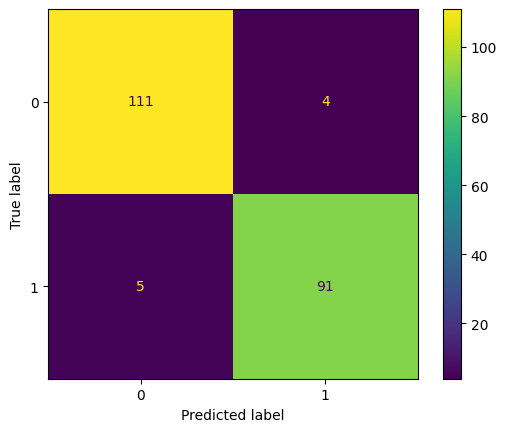

**************************************************
Precision: 95.78947368421052
Recall: 94.79166666666666


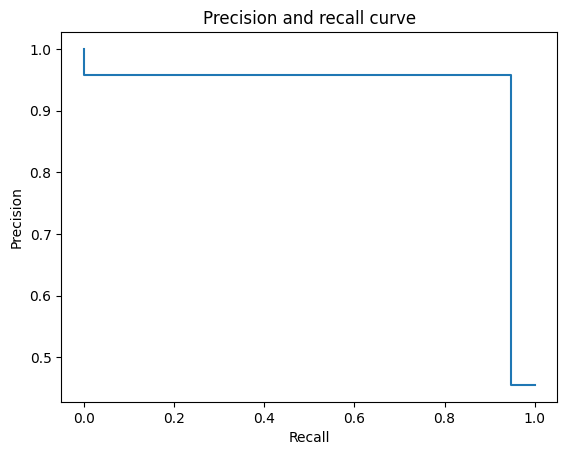

**************************************************


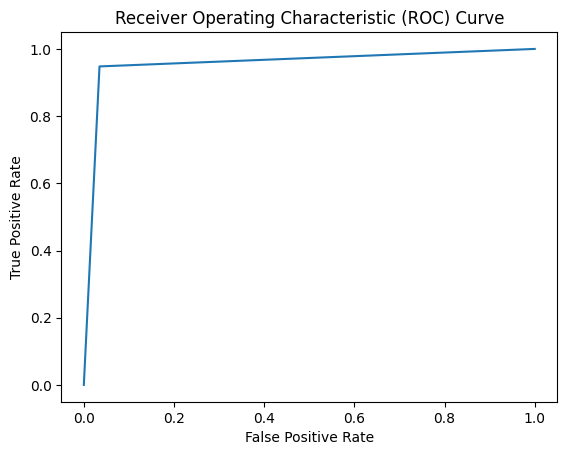

**************************************************
Area Under the ROC Curve (AUC): 95.6567028985507
**************************************************


In [173]:
Y_pred_knn = []
#Inference for each row of the test dataset
for i in X_test_knn:
    Y_pred_knn.append(K_Nearest_Neighbor(i, X_training_knn, 3, Y_training_knn))


Y_pred_knn = np.array(Y_pred_knn)

################### Test Accuracy ###################
acc_knn = accuracy_score(Y_test_knn, Y_pred_knn)

print("Accuracy on the test set:", acc_knn*100)
# plot_acc(acc_list)
print('*'*50)


################### F1 Score ###################
f1_knn = f1_score(Y_test_knn, Y_pred_knn)

print("F1 Score:", f1_knn*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_knn = confusion_matrix(Y_test_knn, Y_pred_knn)

#Extract the values ​​from the confusion matrix
_, fp_knn, fn_knn, _ = cm_knn.ravel()

print("False Positives:", fp_knn)
print("False Negatives:", fn_knn)

cm_plt_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
cm_plt_knn.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_knn = precision_score(Y_test_knn, Y_pred_knn)
recall_knn = recall_score(Y_test_knn, Y_pred_knn)

print("Precision:", precision_knn*100)
print("Recall:", recall_knn*100)

#Precision and recall curve
precision_knn, recall_knn, _ = precision_recall_curve(Y_test_knn, Y_pred_knn)

display_knn = PrecisionRecallDisplay(precision=precision_knn, recall=recall_knn)
display_knn.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_knn, tpr_knn, _ = roc_curve(Y_test_knn, Y_pred_knn)

#View the ROC curve
roc_display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn)
roc_display_knn.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("Area Under the ROC Curve (AUC):", roc_auc_knn*100)
print('*'*50)

**Comparison of Logistic Regression with Sklearn**

Accuracy obtained with SKlearn: 97.6303317535545
**************************************************
F1 Score obtained with SKlearn: 97.46192893401015
**************************************************
False Positives obtained with SKlearn: 5
False Negatives obtained with SKlearn: 0


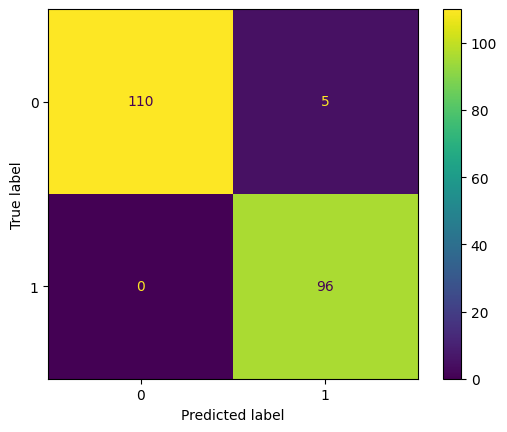

**************************************************
Precision obtained with SKlearn: 95.04950495049505
Recall obtained with SKlearn: 100.0


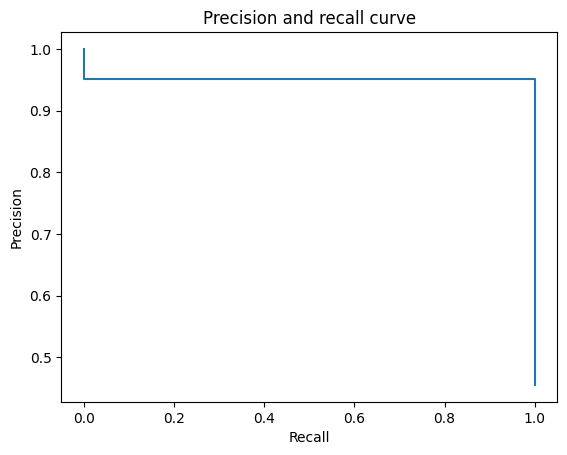

**************************************************


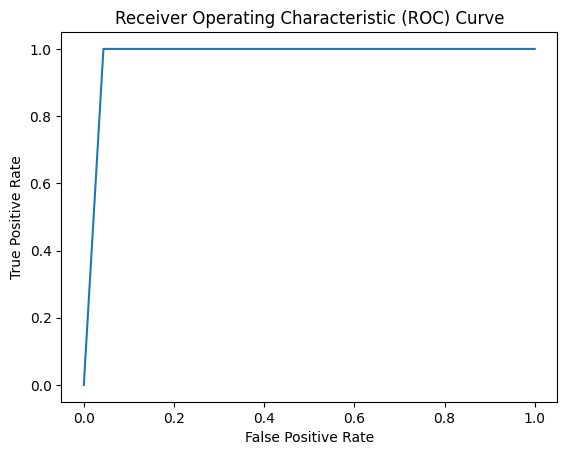

**************************************************
Area Under the ROC Curve (AUC) obtained with SKlearn: 97.82608695652173
**************************************************


In [174]:
from sklearn.neighbors import KNeighborsClassifier

#Train
x_training_knn_sk = dataset_training_knn.drop(['NObeyesdad'],axis=1)
y_training_knn_sk = dataset_training_knn.NObeyesdad
X_training_knn_sk = x_training_knn_sk.to_numpy()
Y_training_knn_sk = y_training_knn_sk.to_numpy()
X_training_knn_sk = np.delete(X_training_knn_sk, 0, axis=0)
Y_training_knn_sk = np.delete(Y_training_knn_sk, 0, axis=0)

#Test
x_test_knn_sk = dataset_test_knn.drop(['NObeyesdad'],axis=1)
X_test_knn_sk = np.delete(x_test_knn_sk, 0, axis=0)

n_neighbors = 3

#Let's create and train a model with scikit-learn
knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
knn_model.fit(X_training_knn_sk, Y_training_knn_sk)

#Make predictions with the model trained on test data
Y_pred_knn_sk = knn_model.predict(X_test_knn_sk)


################### Test Accuracy ###################
acc_knn_sk = accuracy_score(Y_test_knn, Y_pred_knn_sk)

print("Accuracy obtained with SKlearn:", acc_knn_sk*100)
# plot_acc(acc_list)
print('*'*50)


################### F1 Score ###################
f1_knn_sk = f1_score(Y_test_knn, Y_pred_knn_sk)

print("F1 Score obtained with SKlearn:", f1_knn_sk*100)
print('*'*50)


################### Confusion Matrix - False Positive/Negative ###################
cm_knn_sk = confusion_matrix(Y_test_knn, Y_pred_knn_sk)

#Extract the values ​​from the confusion matrix
_, fp_knn_sk, fn_knn_sk, _ = cm_knn_sk.ravel()

print("False Positives obtained with SKlearn:", fp_knn_sk)
print("False Negatives obtained with SKlearn:", fn_knn_sk)

cm_plt_knn_sk = ConfusionMatrixDisplay(confusion_matrix=cm_knn_sk)
cm_plt_knn_sk.plot()
plt.show()
print('*'*50)


################### Precision and Recall (and Curve) ###################
precision_knn_sk = precision_score(Y_test_knn, Y_pred_knn_sk)
recall_knn_sk = recall_score(Y_test_knn, Y_pred_knn_sk)

print("Precision obtained with SKlearn:", precision_knn_sk*100)
print("Recall obtained with SKlearn:", recall_knn_sk*100)

#Precision and recall curve
precision_knn_sk, recall_knn_sk, _ = precision_recall_curve(Y_test_knn, Y_pred_knn_sk)

display_knn_sk = PrecisionRecallDisplay(precision=precision_knn_sk, recall=recall_knn_sk)
display_knn_sk.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall curve')
plt.show()
print('*'*50)


################### ROC Curve ###################
#Calculate the TPR and FPR values ​​for the curve
fpr_knn_sk, tpr_knn_sk, _ = roc_curve(Y_test_knn, Y_pred_knn_sk)

#View the ROC curve
roc_display_knn_sk = RocCurveDisplay(fpr=fpr_knn_sk, tpr=tpr_knn_sk)
roc_display_knn_sk.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print('*'*50)


################### Area Under The Curve ###################
#Calculate AUC using TPR and FPR values
roc_auc_knn_sk = auc(fpr_knn_sk, tpr_knn_sk)
print("Area Under the ROC Curve (AUC) obtained with SKlearn:", roc_auc_knn_sk*100)
print('*'*50)

# **Neural Networks Implementation**

In the implementation of Neural Network(NN) non-numeric data is mapped to numeric values ​​via substitution dictionaries. The forward_propagation function calculates the output of each layer of the network, while back_propagation updates the network weights. The neural_network function trains the model, and the predict_nn function makes predictions using the trained weights. Obviously the implementation allows to choose several hidden nodes on multiple hidden layers.  

I tried different learning rate values and different hidden nodes:  
1) With lr=0.0001 and k=10 the MSE obtained is approximately 59.41172878544158   
2) With lr=0.0001 and k=50 the MSE obtained is approximately 48.49458732823455  
3) With lr=0.0001 and k=100 the MSE obtained is approximately 39.758773827838795  
4) With lr=0.00001 and k=10 the MSE obtained is approximately 79.7925755979705  
5) With lr=0.00001 and k=50 the MSE obtained is approximately 79.69073742018315  
6) With lr=0.00001 and k=100 the MSE obtained is approximately 79.73681398958742  

All tests were done with a hidden layer. We can see that the best learning rate is 0.0001 with 100 hidden nodes.

Since I shuffle the data each time, the tuning results may vary slightly with each run.

In [175]:
#Create dictionaries for each non-numeric field in the dataset for regression
Gender_map_regression = {
    "Male": 1, "Female": 0
}
YesNo_map_regression = {
    "yes": 1, "no": 0
}
CAEC_map_regression = {
    "Always": 3, "Frequently": 2, "no": 0, "Sometimes": 1
}
CALC_map_regression = {
    "Always": 3, "Frequently": 2, "no": 0, "Sometimes": 1
}
MTRANS_map_regression = {
    "Automobile": 1, "Bike": 0, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
}
NObeyesdad_map_regression = {
    "Overweight_Level_I":2 , "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5,
    "Obesity_Type_III": 6, "Normal_Weight": 1, "Insufficient_Weight": 0
}


#DATASET PREPARATION
dataset_test_nn = dataset_test.copy()
dataset_training_nn = dataset_training.copy()

#Train
dataset_training_nn.NObeyesdad.replace(NObeyesdad_map_regression, inplace=True)
dataset_training_nn.Gender.replace(Gender_map_regression, inplace=True)
dataset_training_nn.family_history_with_overweight.replace(YesNo_map_regression, inplace=True)
dataset_training_nn.FAVC.replace(YesNo_map_regression, inplace=True)
dataset_training_nn.CAEC.replace(CAEC_map_regression, inplace=True)
dataset_training_nn.SMOKE.replace(YesNo_map_regression, inplace=True)
dataset_training_nn.SCC.replace(YesNo_map_regression, inplace=True)
dataset_training_nn.CALC.replace(CALC_map_regression, inplace=True)
dataset_training_nn.MTRANS.replace(MTRANS_map_regression, inplace=True)

y_training_nn = dataset_training_nn.Weight
x_training_nn = dataset_training_nn.drop(['Weight'],axis=1)
x_training_nn.insert(0, "Bias", 1, allow_duplicates=False)
X_training_nn = x_training_nn.to_numpy()
Y_training_nn = y_training_nn.to_numpy()

#Test
dataset_test_nn.NObeyesdad.replace(NObeyesdad_map_regression, inplace=True)
dataset_test_nn.Gender.replace(Gender_map_regression, inplace=True)
dataset_test_nn.family_history_with_overweight.replace(YesNo_map_regression, inplace=True)
dataset_test_nn.FAVC.replace(YesNo_map_regression, inplace=True)
dataset_test_nn.CAEC.replace(CAEC_map_regression, inplace=True)
dataset_test_nn.SMOKE.replace(YesNo_map_regression, inplace=True)
dataset_test_nn.SCC.replace(YesNo_map_regression, inplace=True)
dataset_test_nn.CALC.replace(CALC_map_regression, inplace=True)
dataset_test_nn.MTRANS.replace(MTRANS_map_regression, inplace=True)

y_test_nn = dataset_test_nn.Weight
x_test_nn = dataset_test_nn.drop(['Weight'],axis=1)
x_test_nn.insert(0, "Bias", 1, allow_duplicates=False)
X_test_nn = x_test_nn.to_numpy()
Y_test_nn = y_test_nn.to_numpy()



def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)


def back_propagation(df, res, weights, outputs, z, lr):
    alpha = lr
    num_samples = res.shape[0]

    error = res.reshape(-1, 1) - outputs[-1]
    delta_last = error

    weights[-1] += alpha * (1 / num_samples) * np.dot(outputs[-2].T, delta_last)
    #avoid overflow
    weights[-1] = np.clip(weights[-1], -1e2, 1e2)

    for i in range(len(weights) - 2, -1, -1):
        delta_hidden = np.dot(delta_last, weights[i + 1].T) * relu_derivative(z[i])
        weights[i] += alpha * (1 / num_samples) * np.dot(outputs[i].T, delta_hidden)
        weights[i] = np.clip(weights[i], -1e2, 1e2)
        delta_last = delta_hidden

    return weights


def forward_propagation(df, weights):
    outputs = [df]
    z = []

    for i in range(0, len(weights)-1):
        c = np.dot(outputs[i], weights[i])
        a = relu(c)
        outputs.append(a)
        z.append(c)

    c = np.dot(outputs[-1], weights[-1])
    a = c
    outputs.append(a)
    z.append(c)

    return outputs, z


def neural_network(df, res, k, lr=0.0001, num_epochs=20000):

    w = []

    w.append(np.random.randn(df.shape[1], k[0]) * 0.01)
    for i in range(1, len(k)):
        w.append(np.random.randn(k[i-1], k[i]) * 0.01)

    w.append(np.random.randn(k[-1], 1) * 0.01)

    for i in range(num_epochs):
        outputs, z = forward_propagation(df, w)
        w = back_propagation(df, res, w, outputs, z, lr)
        mse_nn = mean_squared_error(res, outputs[-1])

        if i != 0 and i % num_epochs/10 == 0:
            lr = lr * 0.95 * 1/(i/num_epochs)

    return w

def predict_nn(test, w):
  outputs, _ = forward_propagation(test, w)
  return outputs[-1]

**Model Testing and Analysis**


In [180]:
w_nn = neural_network(X_training_nn, Y_training_nn, [64, 32], 0.0001, num_epochs=20000)
Y_pred_nn = predict_nn(X_test_nn, w_nn)

################### MSE ###################
mse_nn = mean_squared_error(Y_test_nn, Y_pred_nn)
print("MSE Neural Network:", mse_nn)
print('*'*50)

################### RMSE ###################
print("RMSE Neural Network:", np.sqrt(mse_nn))
print('*'*50)

################### MAE ###################
mae_nn = mean_absolute_error(Y_test_nn, Y_pred_nn)
print("MAE Neural Network:", mae_nn)
print('*'*50)

MSE Neural Network: 37.4896470058114
**************************************************
RMSE Neural Network: 6.1228789801703085
**************************************************
MAE Neural Network: 4.77257537155649
**************************************************


**Comparison of Neural Network with Sklearn**

In [177]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

#DATASET PREPARATION

#Train
y_training_nn_sk = dataset_training_nn.Weight
x_training_nn_sk = dataset_training_nn.drop(['Weight'],axis=1)
X_training_nn_sk = x_training_nn_sk.to_numpy()
Y_training_nn_sk = y_training_nn_sk.to_numpy()

#Test
y_test_nn_sk = dataset_test_nn.Weight
x_test_nn_sk = dataset_test_nn.drop(['Weight'],axis=1)
X_test_nn_sk = x_test_nn_sk.to_numpy()
Y_test_nn_sk = y_test_nn_sk.to_numpy()


#Model creation and training
model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='sgd', learning_rate='constant', learning_rate_init=0.0001, max_iter=20000, batch_size=10, random_state=42)
model.fit(X_training_nn_sk, Y_training_nn_sk)

#Prediction on test data
Y_pred_nn_sk = model.predict(X_test_nn_sk)

################### MSE SKLEARN ###################
mse_nn_sk = mean_squared_error(Y_test_nn_sk, Y_pred_nn_sk)
print("MSE obtained with SKlearn in NN:", mse_nn_sk)
print('*'*50)

################### RMSE SKLEARN ###################
print("MSE obtained with SKlearn in NN:", np.sqrt(mse_nn_sk))
print('*'*50)

################### MAE SKLEARN ###################
mae_nn_sk = mean_absolute_error(Y_test_nn_sk, Y_pred_nn_sk)
print("MSE obtained with SKlearn in NN:", mae_nn_sk)
print('*'*50)

MSE obtained with SKlearn in NN: 29.74280151247981
**************************************************
MSE obtained with SKlearn in NN: 5.45369613312658
**************************************************
MSE obtained with SKlearn in NN: 4.425142869061082
**************************************************


# **Analysis and comparison of models**

**Regression**

We compare the performance of the regression models, using the Mean Squared Error as a metric.


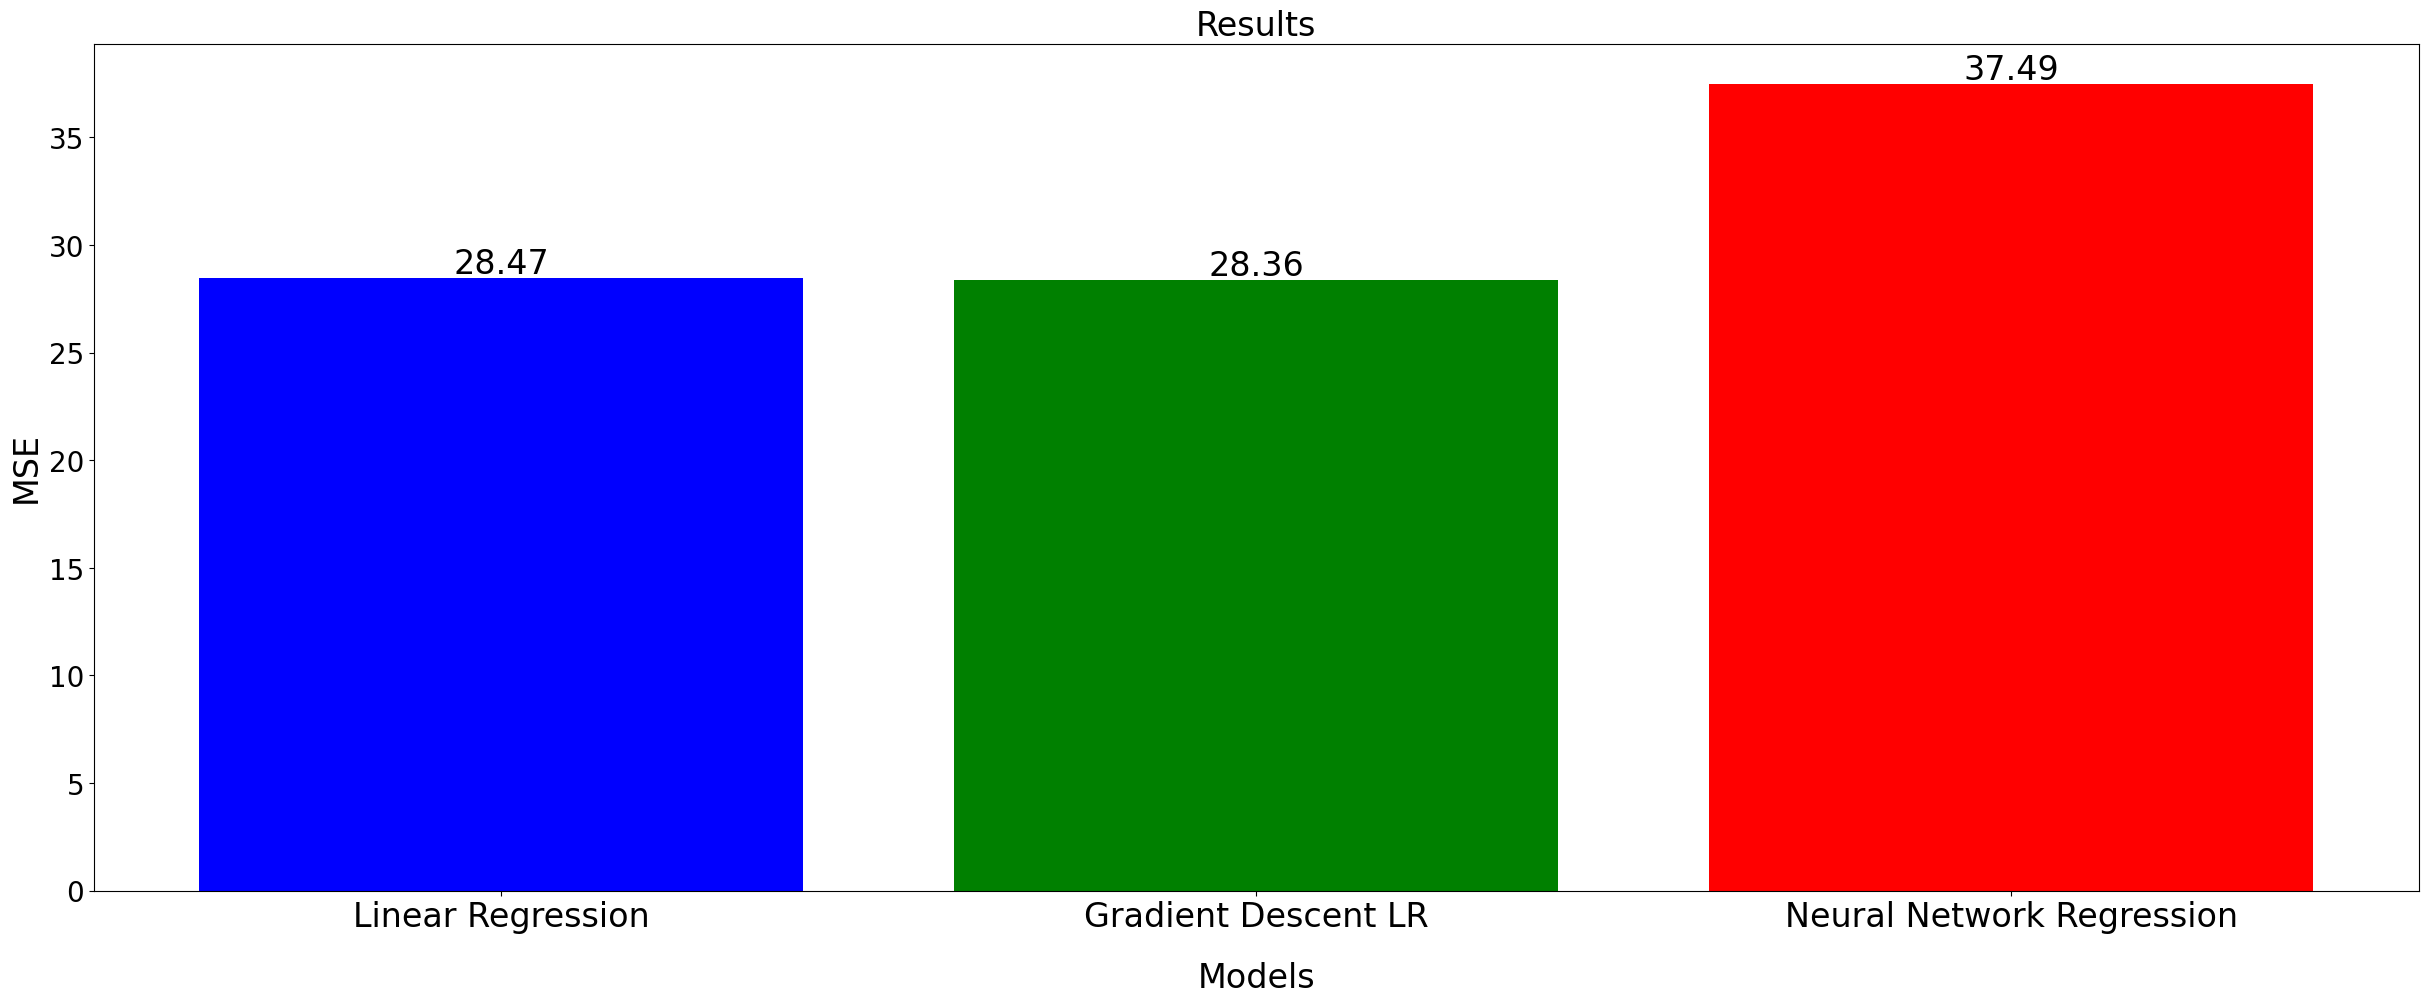

In [181]:
data=[{'Linear Regression':MSE, \
       'Gradient Descent LR':mse_gradient, \
       'Neural Network Regression':mse_nn \
       }]
hist_df = pd.DataFrame(data,index=['Mean Squared Error'])
plt.figure(figsize=(30,11))
plt.title('Results', fontsize=24)
plt.ylabel('MSE', fontsize=24)
plt.xlabel('Models', fontsize=24, labelpad=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
colors = ['blue', 'green', 'red']
plt.bar(hist_df.columns.to_numpy(),hist_df.values[0],color=colors)
for i in range(hist_df.shape[1]):
    val=hist_df.values[0][i]
    plt.text(i, val-0.1, str(round(val,2)), ha='center', va='bottom', fontsize=24)
plt.show()

**Classification**

We compare the performance of classification models, using accuracy as a metric.
KNN, logistic regression and decision tree achieve high accuracy.

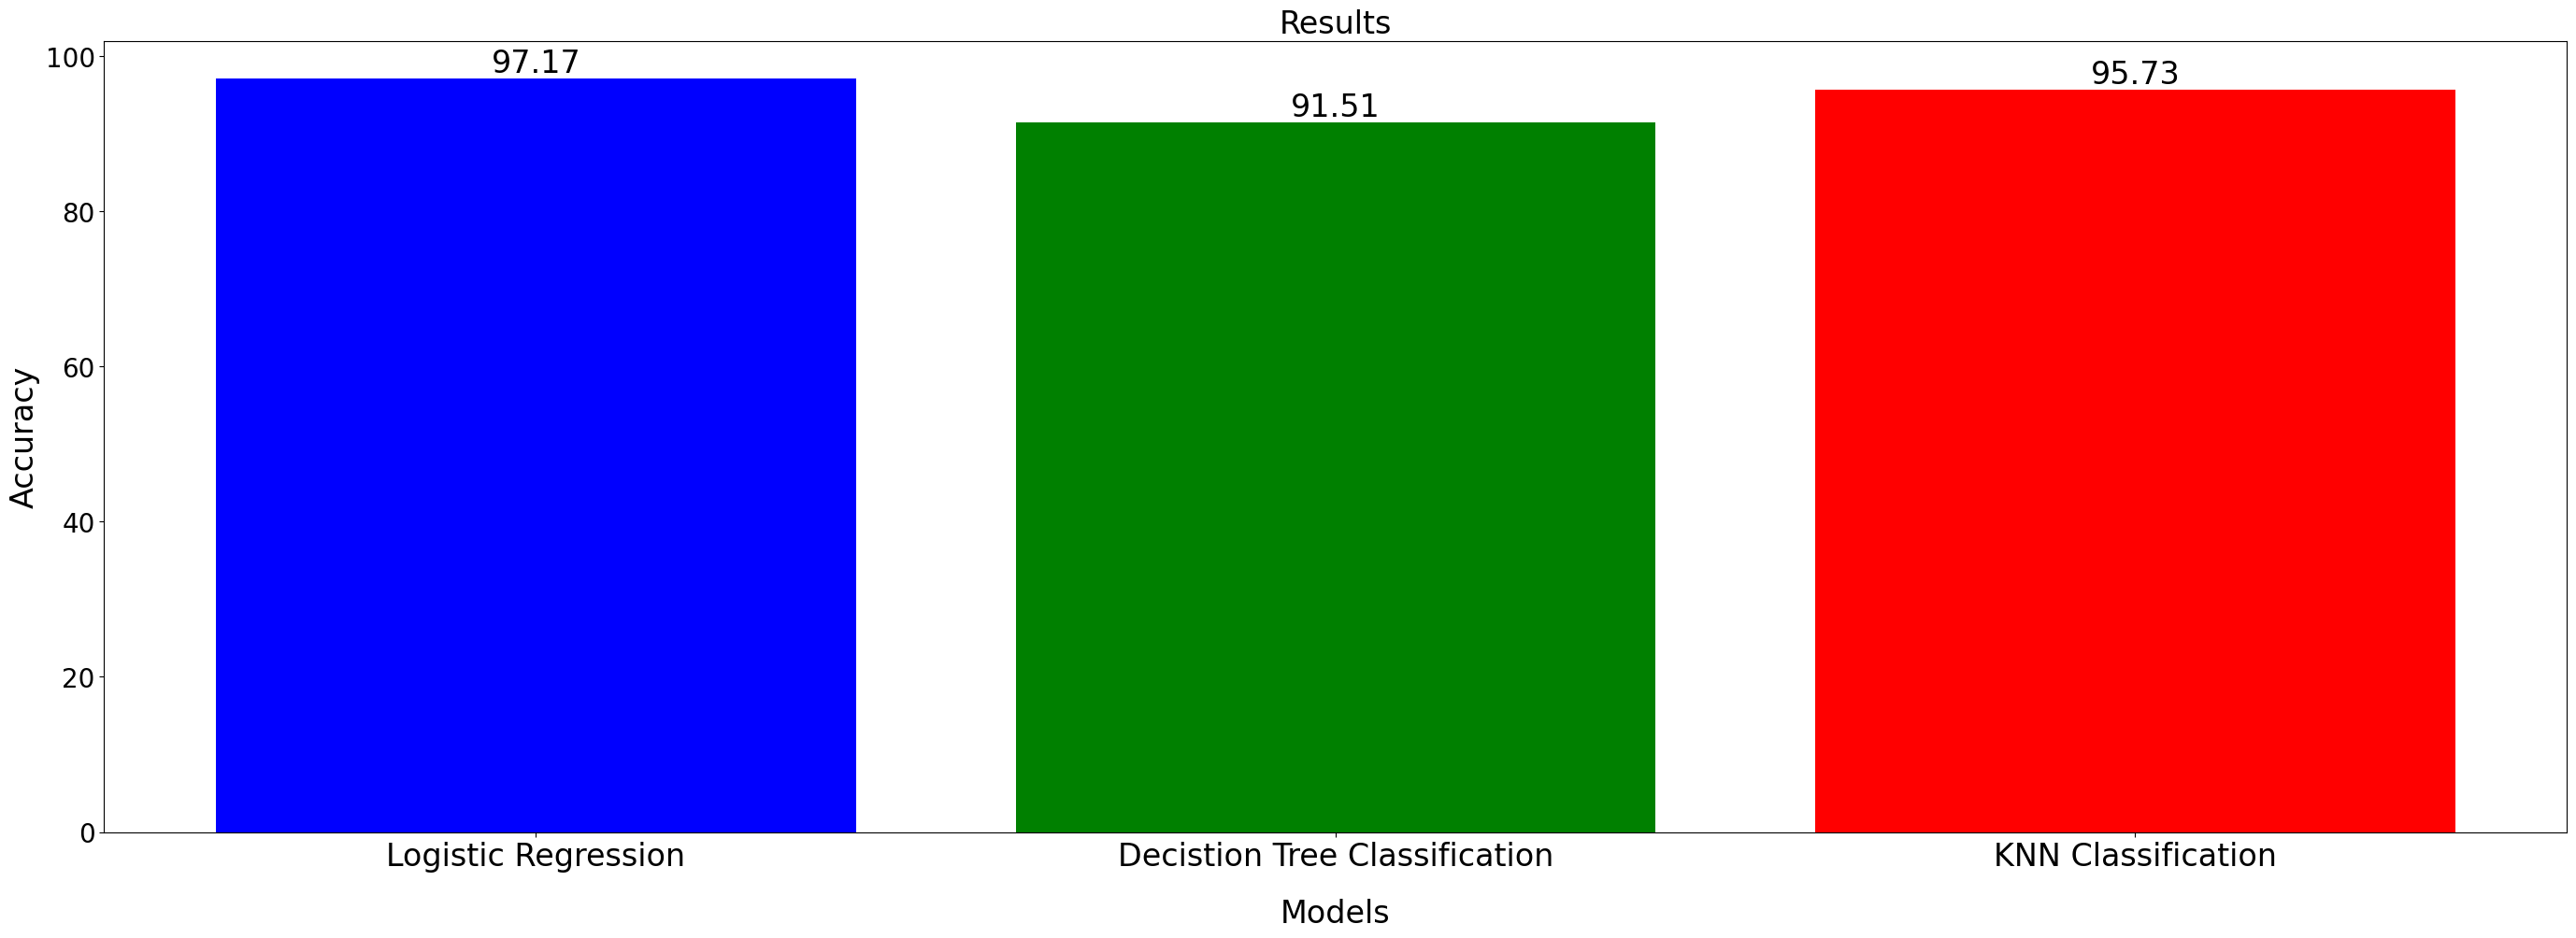

In [179]:
data=[{'Logistic Regression':acc_logistic*100, \
       'Decistion Tree Classification':acc_ldt*100, \
       'KNN Classification':acc_knn*100, \
       }]
hist_df = pd.DataFrame(data,index=['Mean Squared Error'])
plt.figure(figsize=(34,11))
plt.title('Results', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
plt.xlabel('Models', fontsize=24, labelpad=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
colors = ['blue', 'green', 'red']
plt.bar(hist_df.columns.to_numpy(),hist_df.values[0],color=colors)
for i in range(hist_df.shape[1]):
    val=hist_df.values[0][i]
    plt.text(i, val-0.1, str(round(val,2)), ha='center', va='bottom', fontsize=24)
plt.show()